# LIF phase locking

Implementation of the paper:

- Brette, Romain. "Dynamics of one-dimensional spiking neuron
  models." Journal of mathematical biology 48.1 (2004): 38-56.

In [1]:
import matplotlib.pyplot as plt
import brainpy as bp
import numpy as np

In [2]:
# set parameters
bp.profile.set(jit=False)

tau = 100.  # ms
Vth = 1.  # mV
Vr = 0.  # mV

In [3]:
# define neuorn type
@bp.integrate
def int_f(V, t, Isyn):
    return (-V + Isyn + 2 * np.sin(2 * np.pi * t / tau)) / tau

def update(ST, _t):
    V = int_f(ST['V'], _t, ST['input'])
    spike = V >= Vth
    ST['spike'] = spike
    ST['V'] = np.where(spike, Vr, V)
    ST['input'] = 0.


ST = bp.types.NeuState({'V': 0, 'spike': 0., 'input': 0.})

In [4]:
# build and simulate neuron group
lif = bp.NeuType(name='LIF',
                 ST=ST,
                 steps=update)

group = bp.NeuGroup(lif, geometry=2000, monitors=['spike'])
inputs = np.linspace(2., 4., group.num)
group.run(duration=10 * 1000., inputs=('input', inputs), report=False)

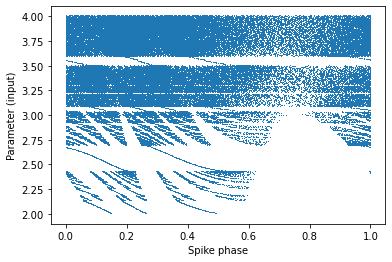

In [5]:
# visualization
idx = int(5 * 1000. / bp.profile.get_dt())
indices, times = bp.measure.raster_plot(group.mon.spike[idx:], group.mon.ts[idx:])
plt.plot((times % tau) / tau, inputs[indices], ',')
plt.xlabel('Spike phase')
plt.ylabel('Parameter (input)')
plt.show()